In [67]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
df = pd.read_csv('train.csv')

In [69]:
N = 10000
df_t = df.loc[0:N][['pickup_longitude', 'dropoff_longitude', 'pickup_latitude', 'dropoff_latitude', 'trip_duration']]

In [70]:
df_t

,pickup_longitude,dropoff_longitude,pickup_latitude,dropoff_latitude,trip_duration
0,-73.987793,-73.975616,40.724792,40.656445,1454
1,-73.957596,-73.951424,40.717770,40.775230,1409
2,-74.000954,-73.947708,40.742031,40.782200,1081
3,-73.985733,-73.993179,40.738258,40.754890,800
4,-74.006615,-73.985619,40.740650,40.723362,1151
5,-73.997253,-73.993835,40.719234,40.762051,1619
6,-73.994537,-73.961098,40.753037,40.687229,2209
7,-73.873055,-74.006378,40.774086,40.738487,2458
8,-73.980354,-73.943390,40.780540,40.835976,1584
9,-73.782448,-73.926926,40.644691,40.703735,2337


In [ ]:
from geopy.distance import vincenty
# pickup = (40.724792, -73.987793)
# dropoff = (40.656445, -73.975616)
# print(vincenty(pickup, dropoff).meters)

distance = []

for i in range(N + 1):
    a, b = df_t.loc[i]['pickup_latitude'], df_t.loc[i]['pickup_longitude']
    pickup = (a, b)
    c, d = df_t.loc[i]['dropoff_latitude'], df_t.loc[i]['dropoff_longitude']
    dropoff = (c, d)
    distance.append(vincenty(pickup, dropoff).meters)
    print(vincenty(pickup, dropoff).meters)

df_t['distance'] = distance

In [72]:
df_t.tail(n = 10)

,pickup_longitude,dropoff_longitude,pickup_latitude,dropoff_latitude,trip_duration,distance
9991,-74.014015,-74.004211,40.712921,40.724174,499,1499.273003
9992,-73.978233,-73.982300,40.786537,40.775597,430,1262.505067
9993,-73.980095,-73.988709,40.755234,40.742626,252,1577.766329
9994,-73.990959,-74.000473,40.734158,40.721153,628,1652.708015
9995,-73.955521,-73.948700,40.779411,40.794746,544,1797.636466
9996,-73.969963,-73.961121,40.758110,40.769051,218,1426.013229
9997,-73.989738,-73.995949,40.741364,40.720238,953,2403.937616
9998,-73.978394,-73.983017,40.752197,40.771778,1163,2209.205050
9999,-73.965485,-73.958946,40.805832,40.814640,205,1122.997899
10000,-73.974815,-73.961067,40.756527,40.772186,536,2090.805380


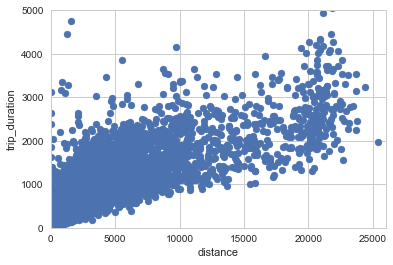

In [74]:
plt.xlabel('distance')
plt.ylabel('trip_duration')
plt.xlim(0, 26000)
plt.ylim(0, 5000)
plt.scatter(df_t['distance'], df_t['trip_duration'])